# 机器学习系列(1)_
# 一、逻辑回归初步 

作者：寒小阳 && 龙心尘
时间：2015年10月。
出处：http://blog.csdn.net/han_xiaoyang/article/details/49123419。
声明：版权所有，转载请注明出处，谢谢。

1、总述

逻辑回归是应用非常广泛的一个分类机器学习算法，它**将数据拟合到一个logit函数(或者叫做logistic函数)中**，从而能够完成**对事件发生的概率进行预测**。

>说逻辑回归，我们得追溯到线性回归，想必大家对线性回归都有一定的了解，即对于多维空间中存在的样本点，我们用特征的线性组合去拟合空间中点的分布和轨迹。如下图所示：

<img src="http://img.blog.csdn.net/20151014123301565?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQv/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center" width=436 align=left />

线性回归能对连续值结果进行预测，而现实生活中常见的另外一类问题是，分类问题。最简单的情况是是与否的二分类问题。比如说医生需要判断病人是否生病，银行要判断一个人的信用程度是否达到可以给他发信用卡的程度，邮件收件箱要自动对邮件分类为正常邮件和垃圾邮件等等。

>既然能够用线性回归预测出连续值结果，那根据结果设定一个阈值是不是就可以解决这个问题了呢？事实是，对于很标准的情况，确实可以的，这里我们套用Andrew Ng老师的课件中的例子，下图中X为数据点肿瘤的大小，Y为观测结果是否是恶性肿瘤。通过构建线性回归模型，如hθ(x)所示，构建线性回归模型后，我们设定一个阈值0.5，预测hθ(x)≥0.5的这些点为恶性肿瘤，而hθ(x)<0.5为良性肿瘤。

<img src='http://img.blog.csdn.net/20151014123518573?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQv/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center' width=456  />

但很多实际的情况下，我们需要学习的分类数据并没有这么精准，比如说上述例子中突然有一个不按套路出牌的数据点出现，如下图所示：
<img src='http://img.blog.csdn.net/20151014123606004?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQv/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center',width=456 />

你看，现在你再设定0.5，这个***判定阈值就失效了***，而现实生活的分类问题的数据，会比例子中这个更为复杂，而这个时候我们借助于***线性回归+阈值***的方式，已经很难完成一个***鲁棒性很好***的分类器了。

在这样的场景下，逻辑回归就诞生了。
>它的核心思想是，如果***线性回归的结果输出***是一个***连续值***，而***值的范围是无法限定的***，那我们有没有办法把这个***结果值映射***为可以帮助我们判断的结果呢。

>如果输出结果是 (0,1) 的一个***概率值***，这个问题就很清楚了。我们在数学上找了一圈，还真就找着这样一个简单的函数了，就是很神奇的***sigmoid函数***(如下)：
<img src='http://img.blog.csdn.net/20151014123727818?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQv/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center'  width=123 />


如果把sigmoid函数图像画出来，是如下的样子：<img src='http://img.blog.csdn.net/20151014124034991?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQv/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center'  width=456 />

从函数图上可以看出，函数y=g(z)在z=0的时候取值为1/2，而随着z逐渐变小，函数值趋于0，z逐渐变大的同时函数值逐渐趋于1，而这正是一个概率的范围。
所以我们定义线性回归的预测函数为Y=WTX，那么逻辑回归的输出Y= g(WTX)，其中y=g(z)函数正是上述sigmoid函数(或者简单叫做S形函数)。

##  2、判定边界
我们现在再来看看，为什么逻辑回归能够解决分类问题。这里引入一个概念，叫做***判定边界***，可以理解为是用以***对不同类别的数据分割的边界***，边界的两旁应该是不同类别的数据。

从二维直角坐标系中，举几个例子，大概是如下这个样子：
<img src='http://img.blog.csdn.net/20151014124124641?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQv/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center' width=456  />

<img src='http://img.blog.csdn.net/20151014124156527?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQv/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center' width=456  />
<img src='http://img.blog.csdn.net/20151014124241795?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQv/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center' width=456  />

上述三幅图中的红绿样本点为不同类别的样本，而我们划出的线，不管是直线、圆或者是曲线，都能比较好地将图中的两类样本分割开来。这就是我们的判定边界，下面我们来看看，逻辑回归是如何根据样本点获得这些判定边界的。

我们依旧借用Andrew Ng教授的课程中部分例子来讲述这个问题。

>回到sigmoid函数，我们发现：  
当g(z)≥0.5时, z≥0;

>对于hθ(x)=g(θTX)≥0.5, 则θTX≥0, 此时意味着预估y=1;

>反之，当预测y = 0时，θTX<0;

所以我们认为***θTX = 0 ***是一个决策边界
当它大于0或小于0时，逻辑回归模型分别预测不同的分类结果。

先看第一个例子hθ(x)=g(θ0+θ1X1+θ2X2)，其中θ0 ,θ1 ,θ2分别取-3, 1, 1。则当−3+X1+X2≥0时, y = 1; 则X1+X2=3是一个决策边界，图形表示如下，刚好把图上的两类点区分开来：
<img src='http://img.blog.csdn.net/20151014124638710?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQv/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center' width=226 />

例1只是一个线性的决策边界，当hθ(x)更复杂的时候，我们可以得到非线性的决策边界，例如：
<img src='http://img.blog.csdn.net/20151014124838937?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQv/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center' width=234 />
这时当x12+x22≥1时，我们判定y=1，这时的决策边界是一个圆形，如下图所示：
<img src='http://img.blog.csdn.net/20151014124912098?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQv/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center' width 234 />
>所以我们发现，理论上说，只要我们的hθ(x)设计足够合理，准确的说是g(θTx)中θTx足够复杂，我们能在不同的情形下，拟合出不同的判定边界，从而把不同的样本点分隔开来。


## 3.代价函数与梯度下降
我们通过对判定边界的说明，知道会有***合适的参数θ***使得***θTx=0成为很好的分类判定边界***，那么问题就来了，我们如何***判定我们的参数θ是否合适***，有多合适呢？更进一步，我们有没有办法去***求得这样的合适参数θ***呢？

这就是我们要提到的***代价函数与梯度下降了***。

### 代价函数Cost Function
其实是一种***衡量我们在这组参数***下***预估的结果***和***实际结果差距***的函数，比如说线性回归的代价函数定义为:
<img width="242" height="71" alt="" src="http://img.blog.csdn.net/20151014125116151?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQv/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center">
当然我们可以和线性回归类比得到一个代价函数，实际就是上述公式中hθ(x)取为逻辑回归中的g(θTx)
>但是这会引发代价函数为“非凸”函数的问题，简单一点说就是这个函数有很多个局部最低点，如下图所示：
<img src="http://52opencourse.com/?qa=blob&amp;qa_blobid=607435295049781725" alt="非凸函数-我爱公开课-52opencourse.com">
而我们希望我们的代价函数是一个如下图所示，碗状结构的凸函数，这样我们算法求解到局部最低点，就一定是全局最小值点。
<img src="http://52opencourse.com/?qa=blob&amp;qa_blobid=847516551720124317" alt="凸函数-我爱公开课-52opencouse.com">
因此，上述的Cost Function对于逻辑回归是不可行的，我们需要其他形式的Cost Function来保证逻辑回归的成本函数是凸函数。

我们跳过大量的数学推导，直接出结论了，我们找到了一个适合逻辑回归的代价函数:
<img width="420" height="77" alt="" src="http://img.blog.csdn.net/20151014130511356?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQv/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center">
Andrew Ng老师解释了一下这个代价函数的合理性，我们首先看当y=1的情况：
<img width="260" height="250" src="http://52opencourse.com/?qa=blob&amp;qa_blobid=7499905772199633281" alt="对数似然损失函数解释1-我爱公开课-52opencouse.com">
如果我们的类别y = 1, 而判定的hθ(x)=1，则Cost = 0，此时预测的值和真实的值完全相等，代价本该为0；而如果判断hθ(x)→0，代价->∞，这很好地惩罚了最后的结果。

而对于y=0的情况，如下图所示，也同样合理：
<img width="260" height="250" src="http://52opencourse.com/?qa=blob&amp;qa_blobid=16991899942735763470" alt="对数似然损失函数解释2-我爱公开课-52opencourse.com">

### 梯度下降
梯度下降算法是***调整参数θ***使得***代价函数J(θ)***取得最小值的最基本方法之一。从直观上理解，就是我们在碗状结构的凸函数上取一个***初始值***，然后挪动这个值***一步步靠近最低点的过程***，如下图所示：
<img width="350" height="350" alt="" src="http://img.blog.csdn.net/20151014125344499?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQv/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center">


先简化一下逻辑回归的代价函数：
<img width="500" height="100" src="http://52opencourse.com/?qa=blob&amp;qa_blobid=4662816715826976375" alt="逻辑回归代价函数简化公式-我爱公开课-52opencourse.com">

从数学上理解，我们为了找到最小值点，就应该朝着下降速度最快的方向(导函数/偏导方向)迈进，每次迈进一小步，再看看此时的下降最快方向是哪，再朝着这个方向迈进，直至最低点。

#### 迭代公式表示出来的最小化J(θ)的梯度下降算法如下：
<img width="414" height="163" src="http://52opencourse.com/?qa=blob&amp;qa_blobid=5185913255970284499" alt="逻辑回归梯度下降算法-我爱公开课-52opencourse.com">
<img width="421" height="147" src="http://52opencourse.com/?qa=blob&amp;qa_blobid=14303327028035669672" alt="梯度下降算法-我爱公开课-52opencourse.com">

## 4、代码与实现

我们来一起看两个具体数据上做逻辑回归分类的例子，其中一份数据为线性判定边界，另一份为非线性。

示例1。

第一份数据为data1.txt，部分内容如下：
<img width="200" height="260" alt="" src="http://img.blog.csdn.net/20151014125459234?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQv/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center">

下面我们写好计算sigmoid函数、代价函数、和梯度下降的程序：

In [25]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.optimize import minimize

from sklearn.preprocessing import PolynomialFeatures

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [29]:
def loaddata(file, delimeter):
    data = np.loadtxt(file, delimiter=delimeter)
    print('Dimensions: ',data.shape)
    print(data[1:6,:])
    return(data)
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # 获得正负样本的下标(即哪些是正样本，哪些是负样本)
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);
data = loaddata('dataset/data1.txt', ',')

('Dimensions: ', (100, 3))
[[ 30.28671077  43.89499752   0.        ]
 [ 35.84740877  72.90219803   0.        ]
 [ 60.18259939  86.3085521    1.        ]
 [ 79.03273605  75.34437644   1.        ]
 [ 45.08327748  56.31637178   0.        ]]


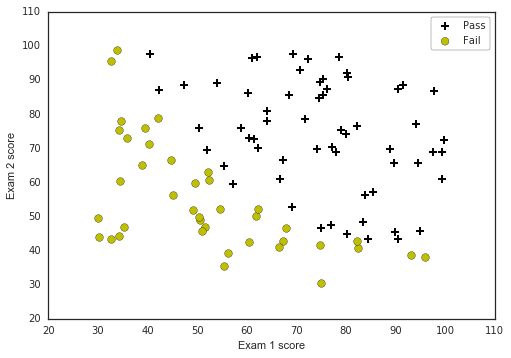

In [30]:
X = np.c_[np.ones((data.shape[0],1)), data[:,0:2]]
y = np.c_[data[:,2]]
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Pass', 'Fail')

### 逻辑斯特回归假设
$$h_{\theta}(x)=g(\theta^{T}x)$$
$$g(z)=\frac{1}{1+e^{−z}}$$

In [31]:
#定义sigmoid函数
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

### 损失函数
$$J(\theta)=\frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\,-log\,(h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big]$$
### 向量化的损失函数(矩阵形式)
$$J(\theta)=\frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big)$$

### 求偏导(梯度)
$$\frac{\delta-J(\theta)}{\delta\theta_{j}}=\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})x^{(i)}_{j}$$

### 向量化的偏导(梯度)
$$\frac{\delta-J(\theta)}{\delta\theta_{j}}=\frac{1}{m}X^T(g(X\theta)-y)$$

In [33]:
#定义损失函数
def costFunction(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    
    J = -1.0*(1.0/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
               
    if np.isnan(J[0]):
        return(np.inf)
    return J[0]

In [34]:
#求解梯度
def gradient(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1,1)))
    
    grad =(1.0/m)*X.T.dot(h-y)

    return(grad.flatten())
initial_theta = np.zeros(X.shape[1])
cost = costFunction(initial_theta, X, y)
grad = gradient(initial_theta, X, y)
print('Cost: \n', cost)
print('Grad: \n', grad)

('Cost: \n', 0.69314718055994495)
('Grad: \n', array([ -0.1       , -12.00921659, -11.26284221]))


In [35]:
res = minimize(costFunction, initial_theta, args=(X,y), jac=gradient, options={'maxiter':400})
res

      fun: 0.20349770158944075
 hess_inv: array([[  3.24739469e+03,  -2.59380769e+01,  -2.63469561e+01],
       [ -2.59380769e+01,   2.21449124e-01,   1.97772068e-01],
       [ -2.63469561e+01,   1.97772068e-01,   2.29018831e-01]])
      jac: array([ -2.73305351e-10,   1.43144023e-07,  -1.58965804e-07])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 23
     njev: 28
   status: 0
  success: True
        x: array([-25.16133401,   0.20623172,   0.2014716 ])

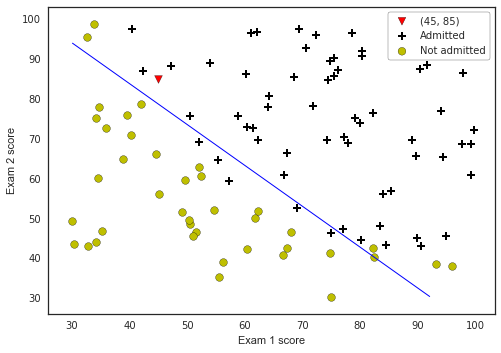

In [37]:
def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return(p.astype('int'))
sigmoid(np.array([1, 45, 85]).dot(res.x.T))
plt.scatter(45, 85, s=60, c='r', marker='v', label='(45, 85)')
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')
x1_min, x1_max = X[:,1].min(), X[:,1].max(),
x2_min, x2_max = X[:,2].min(), X[:,2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(res.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b');

示例2.

第二份数据为data2.txt，部分内容如下：
<img width="145" height="340" alt="" src="http://img.blog.csdn.net/20151014125654926?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQv/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center">
把数据的分布画出来
<img width="450" height="315" alt="" src="http://img.blog.csdn.net/20151014125725759?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQv/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center">

我们发现在这个例子中，我们没有办法再用一条直线把两类样本点近似分开了，所以我们打算试试多项式的判定边界，那么我们先要对给定的两个feature做一个多项式特征的映射。比如说，我们做了如下的一个映射：
<img width="270" height="240" alt="" src="http://img.blog.csdn.net/20151014125802837?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQv/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center">

('Dimensions: ', (118, 3))
[[-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]
 [-0.52477   0.2098    1.      ]]


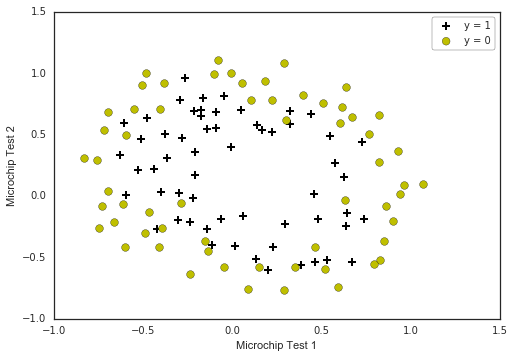

In [42]:
data2 = loaddata('dataset/data2.txt', ',')
# 拿到X和y
y = np.c_[data2[:,2]]
X = data2[:,0:2]
# 画个图
plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')



In [41]:
#咱们整一点多项式特征出来(最高6阶)
poly = PolynomialFeatures(6)
XX = poly.fit_transform(data2[:,0:2])
# 看看形状(特征映射后x有多少维了)
XX.shape

(118, 28)

### 正则化后损失函数
$$J(\theta)=\frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\,log\,(h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big]+\frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}$$
### 向量化的损失函数(矩阵形式)
$$J(\theta)=\frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big)+\frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}$$

In [44]:
# 定义损失函数
def costFunctionReg(theta, reg, *args):
    m = y.size
    h = sigmoid(XX.dot(theta))
    
    J = -1.0*(1.0/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y)) + (reg/(2.0*m))*np.sum(np.square(theta[1:]))
    
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

### 偏导(梯度)
$$\frac{\delta-J(\theta)}{\delta\theta_{j}}=\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})x^{(i)}_{j}+\frac{\lambda}{m}\theta_{j}$$
### 向量化的偏导(梯度)   注意，我们另外自己加的参数 θ0 不需要被正则化
$$\frac{\delta-J(\theta)}{\delta\theta_{j}}=\frac{1}{m}X^T(g(X\theta)-y)+\frac{\lambda}{m}\theta_{j}$$

In [45]:
def gradientReg(theta, reg, *args):
    m = y.size
    h = sigmoid(XX.dot(theta.reshape(-1,1)))
      
    grad = (1.0/m)*XX.T.dot(h-y) + (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
        
    return(grad.flatten())

initial_theta = np.zeros(XX.shape[1])
costFunctionReg(initial_theta, 1, XX, y)

0.69314718055994495

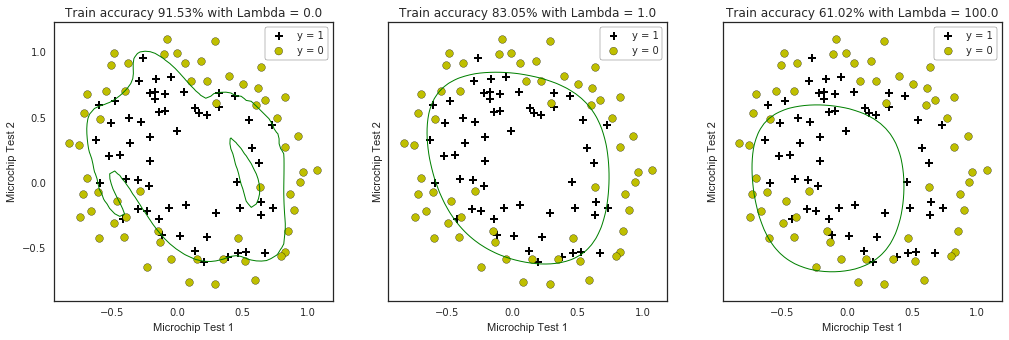

In [46]:
fig, axes = plt.subplots(1,3, sharey = True, figsize=(17,5))

# 决策边界，咱们分别来看看正则化系数lambda太大太小分别会出现什么情况
# Lambda = 0 : 就是没有正则化，这样的话，就过拟合咯
# Lambda = 1 : 这才是正确的打开方式
# Lambda = 100 : 卧槽，正则化项太激进，导致基本就没拟合出决策边界

for i, C in enumerate([0.0, 1.0, 100.0]):
    # 最优化 costFunctionReg
    res2 = minimize(costFunctionReg, initial_theta, args=(C, XX, y), jac=gradientReg, options={'maxiter':3000})
    
    # 准确率
    accuracy = 100.0*sum(predict(res2.x, XX) == y.ravel())/y.size    

    # 对X,y的散列绘图
    plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0', axes.flatten()[i])
    
    # 画出决策边界
    x1_min, x1_max = X[:,0].min(), X[:,0].max(),
    x2_min, x2_max = X[:,1].min(), X[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(res2.x))
    h = h.reshape(xx1.shape)
    axes.flatten()[i].contour(xx1, xx2, h, [0.5], linewidths=1, colors='g');       
    axes.flatten()[i].set_title('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy, decimals=2), C))

# 总结

总结一下逻辑回归。
> * 它始于输出结果为有实际意义的连续值的线性回归，但是线性回归对于分类的问题没有办法准确而又具备鲁棒性地分割，因此我们设计出了逻辑回归这样一个算法，它的输出结果表征了某个样本属于某类别的概率。


> * 逻辑回归的成功之处在于，将原本输出结果范围可以非常大的θTX 通过sigmoid函数映射到(0,1)，从而完成概率的估测。


> * 而直观地在二维空间理解逻辑回归，是sigmoid函数的特性，使得判定的阈值能够映射为平面的一条判定边界，当然随着特征的复杂化，判定边界可能是多种多样的样貌，但是它能够较好地把两类样本点分隔开，解决分类问题。


> * 求解逻辑回归参数的传统方法是梯度下降，构造为凸函数的代价函数后，每次沿着偏导方向(下降速度最快方向)迈进一小部分，直至N次迭代后到达最低点。


补充

      本文的2份数据可在http://pan.baidu.com/s/1pKxJl1p上下载到，分别为data1.txt和data2.txt，欢迎大家自己动手尝试。

      关于逻辑回归的完整ipython notebook示例代码可以在我的github上(https://github.com/HanXiaoyang/ML_examples/tree/master/logistic_regression)下载到，欢迎指正。

#  二、从直观的数学视角理解逻辑回归
>为了降低理解难度，本文试图用最基础的初等数学来解读逻辑回归，少用公式，多用图形来直观解释推导公式的现实意义，希望使读者能够对逻辑回归有更直观的理解。

## 1.逻辑回归问题的通俗几何描述

逻辑回归处理的是分类问题。我们可以用通俗的几何语言重新表述它：

空间中有***两群点***，一群是圆点“〇”，一群是叉点“X”。我们希望***从空间中选出一个分离边界***，将这两群点分开。
<img title="" alt="逻辑回归几何" src="http://7xnkcs.com1.z0.glb.clouddn.com/longxinchenimage001.png">
>注：分离边界的维数与空间的维数相关。如果是二维平面，分离边界就是一条线（一维）。如果是三维空间，分离边界就是一个空间中的面（二维）。如果是一维直线，分离边界就是直线上的某一点。不同维数的空间的理解下文将有专门的论述。

为了简化处理和方便表述，我们做以下4个约定：
>  * 考虑在二维平面下的情况。
>  * 假设这两类是线性可分的：即可以找到一条最佳的直线，将两类点分开。
>  * 用离散变量y表示点的类别，y只有两个可能的取值。y=1表示是叉点“X”，y=0表示是是圆点“〇”。
>  * 点的横纵坐标用x(X1,X2)表示。

于是，现在的问题就变成了：怎么依靠现有这些点的坐标（X1,X2）和标签（y），找出分界线的方程。

## 2.如何用解析几何的知识找到逻辑回归问题的分界线？
我们用逆推法的思路：
> * 假设我们已经找到了这一条线，再寻找这条线的性质是什么。根据这些性质，再来反推这条线的方程。
<img title="" alt="法向量投影" src="http://7xnkcs.com1.z0.glb.clouddn.com/longxinchenimage002.png">
这条线有什么性质呢？
> * 首先，它能把两类点分开来。——好吧，这是废话。(￣▽￣)”
> * 然后，两类点在这条线的法向量p上的投影的值的正负号不一样，一类点的投影全是正数，另一类点的投影值全是负数！

首先，这个性质是非常好，可以用来区分点的不同的类别。
而且，我们对法向量进行规范:只考虑延长线通过原点的那个法向量p。这样的话，只要求出法向量p，就可以唯一确认这条分界线，这个分类问题就解决了。

>还有什么方法能将法向量p的性质处理地更好呢？
因为计算各个点到法向量p投影，需要先知道p的起点的位置，而起点的位置确定起来很麻烦，我们就干脆将法向量平移使其起点落在坐标系的原点，成为新向量p’。因此，所有点到p’的投影也就变化了一个常量。
<img title="" alt="原点法向量投影" src="http://7xnkcs.com1.z0.glb.clouddn.com/longxinchenimage004.png">
<img title="" alt="原点法向量投影结果" src="http://7xnkcs.com1.z0.glb.clouddn.com/longxinchenimage005.png">

假设这个常量为θ0，p’向量的横纵坐标为(θ1,θ2)。空间中任何一个点x (X1,X2)到p’的投影就是θ1X1+θ2X2，再加上前面的常量值就是：θ0+θ1X1+θ2X2
看到上面的式子有没有感到很熟悉？这不就是逻辑回归函数hθ(x)=g(θ0+θ1X1+θ2X2)中括号里面的部分吗？
令z=θ0+θ1X1+θ2X2 就可以根据z的正负号来判断点x的类别了。


## 2从概率角度理解z的含义。

由以上步骤，我们由点x的坐标得到了一个新的特征z，那么:

>z的现实意义是什么呢？

首先，我们知道，z可正可负可为零。而且，z的变化范围可以一直到正负无穷大。
z如果大于0，则点x属于y=1的类别。而且z的值越大，说明它距离分界线的距离越大，更可能属于y=1类。
那可否把z理解成点x属于y=1类的概率P(y=1|x) （下文简写成P）呢？显然不够理想，因为概率的范围是0到1的。
但是我们可以将概率P稍稍改造一下：令Q=P/(1-P)，期望用Q作为z的现实意义。我们发现，当P的在区间[0,1]变化时，Q在[0,+∞)区间单调递增。函数图像如下（以下图像可以直接在度娘中搜“x/(1-x)”，超快）: 
<img title="" alt="发生比函数图像" src="http://7xnkcs.com1.z0.glb.clouddn.com/longxinchenimage006.png">

但是Q的变化率在[0,+∞)还不够，我们是希望能在(-∞,+∞)区间变化的。而且在P=1/2的时候刚好是0。这样才有足够的解释力。

>因为P=1/2说明该点属于两个类别的可能性相当，也就是说这个点恰好在分界面上，那它在法向量的投影自然就是0了。

而在P=1/2时，Q=1，距离Q=0还有一段距离。那怎么通过一个函数变换然它等于0呢？有一个天然的函数log，刚好满足这个要求。
于是我们做变换R=log(Q)=log(P/(1-P))，期望用R作为z的现实意义。画出它的函数图像如图：
<img title="" alt="logit函数" src="http://7xnkcs.com1.z0.glb.clouddn.com/longxinchenimage007.png">

这个函数在区间[0,1]中可正可负可为零，单调地在(-∞,+∞)变化，而且1/2刚好就是唯一的0值!基本完美满足我们的要求。
>回到我们本章最初的问题，
我们由点x的坐标得到了一个新的特征z，那么z的具体意义是什么呢？

由此，我们就可以将z理解成x属于y=1类的概率P经过某种变换后对应的值。也就是说，z= log(P/(1-P))。反过来就是P=g(z)=1/(1+e-z)。图像如下：
<img title="" alt="sigmoid函数" src="http://7xnkcs.com1.z0.glb.clouddn.com/longxinchenimage008.png">

这两个函数log(P/(1-P)) 、1/(1+e-z)看起来熟不熟悉？

***这就是传说中的logit函数和sigmoid函数!***

小小补充一下：

***在概率理论中，Q=P/(1-P)的意义叫做赔率(odds)。世界杯赌过球的同学都懂哈。赔率也叫发生比，是事件发生和不发生的概率比。
而z= log(P/(1-P))的意义就是对数赔率或者对数发生比（log-odds）。***


于是，我们不光得到了z的现实意义，还得到了z映射到概率P的拟合方程：

>P=hθ(x)=g(θ0+θ1X1+θ2X2)= g(z)=1/(1+e-z)

有了概率P，我们顺便就可以拿拟合方程P=g(z)=1/(1+e-z)来判断点x所属的分类：

>当P>=1/2的时候，就判断点x属于y=1的类别；当P<1/2，就判断点x属于y=0的类别。

<img title="" alt="logit变换" src="http://7xnkcs.com1.z0.glb.clouddn.com/longxinchenimage010.png">

## 3.构造代价函数求出参数的值

到目前为止我们就有两个判断某点所属分类的办法，一个是判断z是否大于0，一个是判断g(z)是否大于1/2。
然而这并没有什么X用，

>以上的分析都是基于“假设我们已经找到了这条线”的前提得到的，但是最关键的(θ0,θ1,θ2)三个参数仍未找到有效的办法求出来。

还有没有其他的性质可供我们利用来求出参数(θ0,θ1,θ2)的值？

> * 我们漏了一个关键的性质：这些样本点已经被标注了y=0或者y=1的类别!
> * 我们一方面可以基于z是否大于0或者g(z) 是否大于1/2来判断一个点的类别，另一方又可以依据这些点已经被标注的类别与我们预测的类别的差值来评估我们预测的好坏。
> * 这种衡量我们在某组参数下预估的结果和实际结果差距的函数，就是传说中的代价函数Cost Function。
> *  当代价函数最小的时候，相应的参数(θ0,θ1,θ2)就是我们希望的最优解。


由此可见，设计一个好的代价函数，将是我们处理好分类问题的关键。而且不同的代价函数，可能会有不同的结果。因此更需要我们将代价函数设计得解释性强，有现实针对性。
> * 为了衡量“预估结果和实际结果的差距”，我们首先要确定“预估结果”和“实际结果”是什么。

> * “实际结果”好确定，就是y=0还是y=1。
> * “预估结果”有两个备选方案，经过上面的分析，我们可以采用z或者g(z)。但是显然g(z)更好，因为g(z)的意义是概率P，刚好在[0,1]范围之间，与实际结果{0，1}很相近，而z的意思是逻辑发生比，范围是整个实数域(-∞,+∞)，不太好与y={0，1}进行比较。

接下来是衡量两个结果的“差距”。

* 我们首先想到的是y-hθ(x)。
        但这是当y=1的时候比较好。如果y=0，则y- hθ(x)= - hθ(x)是负数，不太好比较，则采用其绝对值hθ(x)即可。综合表示如下：
        
<img title="" alt="cost1" src="http://7xnkcs.com1.z0.glb.clouddn.com/longxinchenimage011.png">
> 但这个函数有个问题：求导不太方便，进而用梯度下降法就不太方便。
        因为梯度下降法超出的初等数学的范围，这里就暂且略去不解释了。
        
* 于是对上面的代价函数进行了简单的处理，使之便于求导。结果如下：
<img title="" alt="cost" src="http://7xnkcs.com1.z0.glb.clouddn.com/longxinchenimage012.jpg">

代价函数确定了，接下来的问题就是机械计算的工作了。常见的方法是用梯度下降法。于是，我们的平面线形可分的问题就可以说是解决了。


## 4.从几何变换的角度重新梳理我们刚才的推理过程。
回顾我们的推理过程，我们其实是在不断地将点x(X1,X2)进行几何坐标变换的过程。

> * 第一步是将分布在整个二维平面的点x(X1,X2)通过线性投影映射到一维直线中，成为点x(z)
> * 第二步是将分布在整个一维直线的点x(z)通过sigmoid函数映射到一维线段[0,1]中成为点x(g(z))。
> * 第三步是将所有这些点的坐标通过代价函数统一计算成一个值，如果这是最小值，相应的参数就是我们所需要的理想值。 

## 5.对于简单的非线性可分的问题。

    由以上分析可知。比较关键的是第一步，我们之所以能够这样映射是因为假设我们点集是线性可分的。但是如果分离边界是一个圆呢？考虑以下情况。
<img title="" alt="非线性可分" src="http://7xnkcs.com1.z0.glb.clouddn.com/longxinchenimage015.png">

我们仍用逆推法的思路：

> * 通过观察可知，分离边界如果是一个圆比较合理。
> * 假设我们已经找到了这个圆，再寻找这个圆的性质是什么。根据这些性质，再来反推这个圆的方程。

我们可以依据这个性质：

> * 圆内的点到圆心的距离小于半径，圆外的点到圆心的距离大于半径
> * 假设圆的半径为r，空间中任何一个点x (X1,X2)到原点的距离为X12+X22。
> * 令z= X12+X22-r2，就可以根据z的正负号来判断点x的类别了
> * 然后令P=hθ(x)=g( X12+X22-r2)= g(z)=1/(1+e-z)，就可以继续依靠我们之前的逻辑回归的方法来处理和解释问题了。

从几何变换的角度重新梳理我们刚才的推理过程。

> * 第一步是将分布在整个二维平面的点x(X1,X2)通过某种方式映射到一维直线中，成为点x(z)
> * 第二步是将分布在整个一维射线的点x(z)通过sigmoid函数映射到一维线段[0,1]中成为点x(g(z))。
> * 第三步是将所有这些点的坐标通过代价函数统一计算成一个值v，如果这是最小值，相应的参数就是我们所需要的理想值。
<img title="" alt="这里写图片描述" src="http://7xnkcs.com1.z0.glb.clouddn.com/longxinchenimage016.png">

## 6.从特征处理的角度重新梳理我们刚才的分析过程

其实，做数据挖掘的过程，也可以理解成做特征处理的过程。我们典型的数据挖掘算法，也就是将一些成熟的特征处理过程给固定化的结果。
对于逻辑回归所处理的分类问题，我们已有的特征是这些点的坐标(X1,X2)，我们的目标就是判断这些点所属的分类y=0还是y=1。那么最理想的想法就是希望对坐标(X1,X2)进行某种函数运算，得到一个（或者一些）新的特征z，基于这个特征z是否大于0来判断该样本所属的分类。
对我们上一节非线性可分问题的推理过程进行进一步抽象，我们的思路其实是：

> * 第一步，将点x(X1,X2的坐标通过某种函数运算，得到一个新的类似逻辑发生比的特征，z=f(X1,X2)= X12+X22-r2
> * 第二步是将特征z通过sigmoid函数得到新的特征q=g(z)= 1/(1+e-z)= 1/(1+e-f(X1,X2))。
> * 第三步是将所有这些点的特征q通过代价函数统一计算成一个值v=J(q1,q2,…)，如果这是最小值，相应的参数(r)就是我们所需要的理想值。 
<img title="" alt="特征处理" src="http://7xnkcs.com1.z0.glb.clouddn.com/longxinchenimage017.png">

## 7.对于复杂的非线性可分的问题

由以上分析可知。比较关键的是第一步，如何设计转换函数z=f(X1,X2)。我们现在开始考虑分离边界是一个极端不规则的曲线的情况。 
<img title="" alt="复杂非线性可分" src="http://7xnkcs.com1.z0.glb.clouddn.com/longxinchenimage019.jpg">
我们仍用逆推法的思路：

> * 通过观察等先验的知识（或者完全不观察乱猜），我们可以假设分离边界是某种6次曲线（这个曲线方程可以提前假设得非常复杂，对应着各种不同的情况）。
> * 第一步：将点x(X1,X2)的坐标通过某种函数运算，得到一个新的特征z=f(X1,X2)=θ0+θ1X1+θ2X2+θ3X12+θ4X1X2+θ5X22+…+θ26X1X25+θ27X26。并假设z是某种程度的逻辑发生比，通过其是否大于0来判断样本所属分类。
> * 第二步：将特征z通过sigmoid函数映射到新的特征q=g(z)= 1/(1+e-z)
 > * 第三步：将所有这些样本的特征q通过逻辑回归的代价函数统一计算成一个值v=J(q1,q2,…)，如果这是最小值，相应的参数(θ0,θ1,θ2,…, θ27)就是我们所需要的理想值。
 
## 8.多维逻辑回归的问题

以上考虑的问题都是基于在二维平面内进行分类的情况。其实，对于高维度情况的分类也类似。
高维空间的样本，其区别也只是特征坐标更多，比如四维空间的点x的坐标为(X1,X2，X3,X4)。但直接运用上文特征处理的视角来分析，不过是对坐标x(X1,X2，X3,X4)进行参数更多的函数运算得到新的特征z=f(X1,X2，X3,X4)。并假设z是某种程度的逻辑发生比，通过其是否大于0来判断样本所属分类。
而且，如果是高维线性可分的情况，则可以有更近直观的理解。

> *  如果是三维空间，分离边界就是一个空间中的一个二维平面。两类点在这个二维平面的法向量p上的投影的值的正负号不一样，一类点的投影全是正数，另一类点的投影值全是负数。 
<img title="" alt="三维逻辑回归" src="http://7xnkcs.com1.z0.glb.clouddn.com/longxinchenimage020.png">
> *  如果是高维空间，分离边界就是这个空间中的一个超平面。两类点在这个超平面的法向量p上的投影的值的正负号不一样，一类点的投影全是正数，另一类点的投影值全是负数。
> *  特殊的，如果是一维直线空间，分离边界就是直线上的某一点p。一类点在点p的正方向上，另一类点在点p的负方向上。这些点在直线上的坐标可以天然理解成类似逻辑发生比的情况。可见一维直线空间的分类问题是其他所有高维空间投影到法向量后的结果，是所有逻辑回归问题的基础。 
<img title="" alt="一维逻辑回归" src="http://7xnkcs.com1.z0.glb.clouddn.com/longxinchenimage021.png">

## 9.多分类逻辑回归的问题

以上考虑的问题都是二分类的问题，基本就是做判断题。但是对于多分类的问题，也就是做选择题，怎么用逻辑回归处理呢？ 
<img title="" alt="多分类" src="http://7xnkcs.com1.z0.glb.clouddn.com/longxinchenimage022.png">
> *  其基本思路也是二分类，做判断题。
> *  比如你要做一个三选一的问题，有ABC三个选项。首先找到A与BUC（”U”是并集符号）的分离边界。然后再找B与AUC的分离边界，C与AUB的分离边界。 
<img title="" alt="多分类-二分类" src="http://7xnkcs.com1.z0.glb.clouddn.com/longxinchenimage023.png">
> *  这样就能分别得到属于A、B、C三类的概率，综合比较，就能得出概率最大的那一类了。 
<img title="" alt="最大化" src="http://7xnkcs.com1.z0.glb.clouddn.com/longxinchenimage024.png">

## 10.总结列表
<img title="" alt="逻辑回归" src="http://7xnkcs.com1.z0.glb.clouddn.com/longxinchen%E9%80%BB%E8%BE%91%E5%9B%9E%E5%BD%92.jpg">